In [1]:
import os
import shutil
import sys
import cv2
sys.path.append('/content/drive/MyDrive/thesis/src')
from segmentation.video import Video

def segment_videos(dataset_path: str):
    # make a copy of the provided folder
    dataset_copy_path = dataset_path + '_copy'
    shutil.copytree(dataset_path, dataset_copy_path)

    # get list of all files and folders within the copy
    items = os.listdir(dataset_copy_path)
    # iterate over items
    for item in items:
        print("=================================================================================")
        print(f"Action: {item}\n")
        # check if item is a folder
        if os.path.isdir(os.path.join(dataset_copy_path, item)):
            # get list of all files and folders within the current folder
            videos = os.listdir(os.path.join(dataset_copy_path, item))
            # iterate over children and print their paths
            for video_name in videos:
                video_path = os.path.join(dataset_copy_path, item, video_name)
                print(video_path)
                video = Video(video_path, K=3)
                segments = video.segments
                
                dir_path = os.path.dirname(video_path)
                new_folder = video_name[:-4]
                new_folder_path = os.path.join(dir_path, new_folder)
                os.makedirs(new_folder_path, exist_ok=True)

                for k in range(video.segments_number):
                    segment = segments[k]
                    random_snippet = segments[k].random_snippet
                    rgb_frame = random_snippet.rgb_frame
                    flow_frame = random_snippet.flow_frame
                    pose_frame = random_snippet.body_pose_frame

                    segment_folder_name = f"segment-{k}"
                    segment_folder_path = os.path.join(new_folder_path, segment_folder_name)
                    os.makedirs(segment_folder_path, exist_ok=True)

                    # ======================================
                    rgb_frame_name = "rgb_frame.png"
                    flow_frame_name = "flow_frame.png"
                    pose_frame_name = "pose_frame.png"

                    rgb_frame_file_path = os.path.join(segment_folder_path, rgb_frame_name)
                    flow_frame_file_path = os.path.join(segment_folder_path, flow_frame_name)
                    pose_frame_file_path = os.path.join(segment_folder_path, pose_frame_name)

                    cv2.imwrite(rgb_frame_file_path, rgb_frame)
                    cv2.imwrite(flow_frame_file_path, flow_frame)
                    cv2.imwrite(pose_frame_file_path, pose_frame)
                    # ======================================
                
                os.remove(video_path) # we remove the .avi video
    
segment_videos('/content/drive/MyDrive/thesis/data/HMDB-51-downsampled')

Action: laugh

/content/drive/MyDrive/thesis/data/HMDB-51-downsampled_copy/laugh/Laughing_Girl_laugh_u_nm_np1_ri_goo_3.avi
total frames 276
frames_per_segment 92
start 0 and end 91
start 0 and end 91
start 0 and end 90
/content/drive/MyDrive/thesis/data/HMDB-51-downsampled_copy/laugh/Glory_laugh_u_nm_np1_fr_bad_19.avi
total frames 84
frames_per_segment 28
start 0 and end 27
start 0 and end 27
start 0 and end 26
/content/drive/MyDrive/thesis/data/HMDB-51-downsampled_copy/laugh/Laughing_Girl_laugh_u_nm_np1_ri_goo_1.avi
total frames 467
frames_per_segment 155
start 0 and end 154
start 0 and end 154
start 0 and end 154
/content/drive/MyDrive/thesis/data/HMDB-51-downsampled_copy/laugh/Laughing_for_Skype_laugh_h_cm_np1_fr_goo_2.avi
total frames 147
frames_per_segment 49
start 0 and end 48
start 0 and end 48
start 0 and end 47
Action: kiss

/content/drive/MyDrive/thesis/data/HMDB-51-downsampled_copy/kiss/Hangingbyamomentfavoritekisses_kiss_u_nm_np2_le_goo_3.avi
total frames 247
frames_per_seg

In [ ]:
video = Video("/content/drive/MyDrive/thesis/data/HMDB-51-downsampled/cartwheel/Monikas_Staatsexamen__Turnen_cartwheel_f_cm_np1_ri_med_4.avi", K=3)
segments = video.segments
random_snippet = segments[0].random_snippet

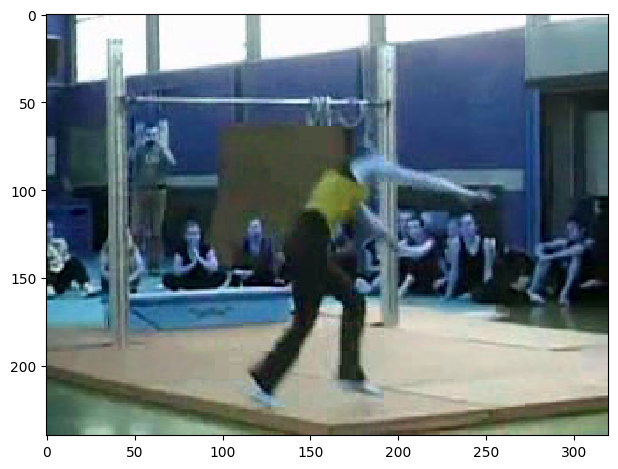

In [ ]:
random_snippet.display_rgb_frame()

/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


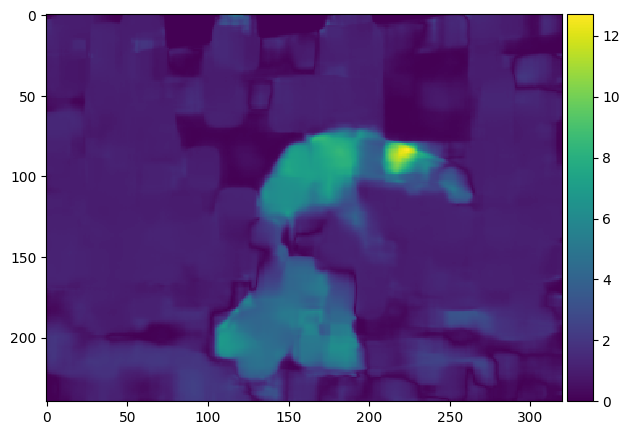

In [ ]:
random_snippet.display_optical_flow_frame()

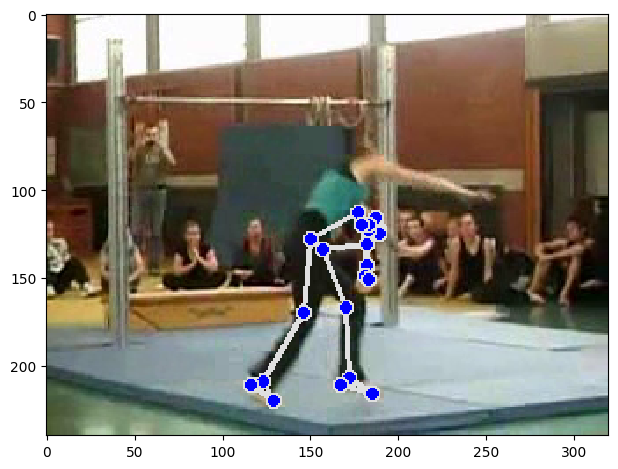

In [ ]:
random_snippet.display_body_pose_frame()